In [1]:
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

%matplotlib inline

Using TensorFlow backend.


In [2]:
class_names = ['RAPUNZEL', 'BELLE', 'TIANA','POCAHONTAS','AURORA','SNOW WHITE']

In [4]:
# get the refence to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []
raw_frames_type_3 = []
raw_frames_type_4 = []
raw_frames_type_5 = []
raw_frames_type_6 = []

while(True):
    # read a new frame
    _, frame = camera.read()
    
    #flip the frame
    frame = cv2.flip(frame, 1)
    
    #rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))
    
    #add rectangle
    cv2.rectangle(frame, (150, 75), (450, 325), (0, 255, 0), 2)
    
    # show the frame
    cv2.imshow("Capturing frames", frame)
    
    key = cv2.waitKey(1)
    
    #quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        #save the frame
        raw_frames_type_1.append(frame)
        print('Key 1 pressed - saved TYPE_1 frame')
    elif key & 0xFF == ord("2"):
        #save the frame
        raw_frames_type_2.append(frame)
        print('Key 2 pressed - saved TYPE_2 frame')
    elif key & 0xFF == ord("3"):
        #save the frame
        raw_frames_type_3.append(frame)
        print('Key 3 pressed - saved TYPE_3 frame')
    elif key & 0xFF == ord("4"):
        #save the frame
        raw_frames_type_4.append(frame)
        print('Key 4 pressed - saved TYPE_4 frame')
    elif key & 0xFF == ord("5"):
        #save the frame
        raw_frames_type_5.append(frame)
        print('Key 5 pressed - saved TYPE_5 frame')
    elif key & 0xFF == ord("6"):
        #save the frame
        raw_frames_type_6.append(frame)
        print('Key 6 pressed - saved TYPE_6 frame')      
        
camera.release()
cv2.destroyAllWindows()

In [3]:
save_width = 399
save_height = 399

In [4]:
for i in range (1,7):
    name = './data/images_type_{}'.format(i)
    os.makedirs(name, exist_ok=True)

In [ ]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:325-2, 150+2:450-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_1/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:325-2, 150+2:450-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_2/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))  

for i, frame in enumerate(raw_frames_type_3):
    roi = frame[75+2:325-2, 150+2:450-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_3/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_4):
    roi = frame[75+2:325-2, 150+2:450-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_4/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_5):
    roi = frame[75+2:325-2, 150+2:450-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_5/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_6):
    roi = frame[75+2:325-2, 150+2:450-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_6/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [6]:
width = 96
height = 96

In [7]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.png')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path, target_size = (width, height))
        x = preprocessing.image.img_to_array(image)
        
        images.append(x)  
    return images

In [8]:
images_type_1 = load_images('./data/images_type_1')
images_type_2 = load_images('./data/images_type_2')
images_type_3 = load_images('./data/images_type_3')
images_type_4 = load_images('./data/images_type_4')
images_type_5 = load_images('./data/images_type_5')
images_type_6 = load_images('./data/images_type_6')

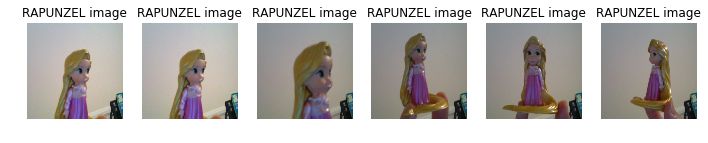

In [9]:
#5 random Rapunzel images (type 1)
plt.figure(figsize=(12,8))

for i in range(6):
    plt.subplot(1,6,i+1)
    image= preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))
    
#show the plot
plt.show()

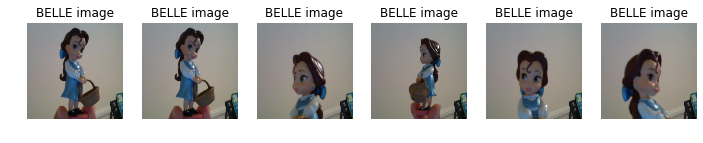

In [10]:
#5 random Belle images (type 2)
plt.figure(figsize=(12,8))

for i in range(6):
    plt.subplot(1,6,i+1)
    image=preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))
    
#show the plot
plt.show()

In [11]:
#Prepare images as tensors
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)
X_type_4 = np.array(images_type_4)
X_type_5 = np.array(images_type_5)
X_type_6 = np.array(images_type_6)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)
print(X_type_4.shape)
print(X_type_5.shape)
print(X_type_6.shape)

(9, 96, 96, 3)
(9, 96, 96, 3)
(9, 96, 96, 3)
(9, 96, 96, 3)
(9, 96, 96, 3)
(9, 96, 96, 3)


In [12]:
#One big array with ALL the princesses
X = np.concatenate((X_type_1, X_type_2, X_type_3, X_type_4, X_type_5, X_type_6), axis=0)

In [13]:
#scaling the color pixels from 0~255 to 0 or 1
X = X / 255.
X.shape

(54, 96, 96, 3)

In [22]:
from keras.utils import to_categorical

#creating y_train
y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]
y_type_4 = [3 for item in enumerate(X_type_4)]
y_type_5 = [4 for item in enumerate(X_type_5)]
y_type_6 = [5 for item in enumerate(X_type_6)]

y = np.concatenate((y_type_1, y_type_2, y_type_3, y_type_4, y_type_5, y_type_6), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(54, 6)


In [23]:
#Convolutional network configuration
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

#default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
               dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
               dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
               lr=lr):
    model = Sequential()
    
    model.add(Convolution2D(conv_1,(3,3),
                           input_shape = (width, height, color_channels),
                           activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(conv_1_drop))
    
    model.add(Convolution2D(conv_2, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(conv_2_drop))
    
    model.add(Flatten())
    
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))
    
    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))
    
    model.add(Dense(len(class_names), activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                 optimizer=Adam(lr=lr),
                 metrics=['accuracy'])
    
    return model

In [24]:
import numpy as np
np.random.seed(1) # for reproducibility

#model with base parameters
model = build_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)             0         
__________

In [25]:
epoch = 20

In [26]:
model.fit(X,y,epochs=epochs)

Epoch 1/30
54/54 [==============================] - 5s 86ms/step - loss: 1.9332 - acc: 0.2222
Epoch 2/30
54/54 [==============================] - 2s 31ms/step - loss: 5.0831 - acc: 0.2222
Epoch 3/30
54/54 [==============================] - 2s 30ms/step - loss: 4.7617 - acc: 0.2222
Epoch 4/30
54/54 [==============================] - 2s 28ms/step - loss: 2.3306 - acc: 0.1667
Epoch 5/30
54/54 [==============================] - 2s 31ms/step - loss: 1.9505 - acc: 0.1481
Epoch 6/30
54/54 [==============================] - 2s 29ms/step - loss: 1.8322 - acc: 0.2222
Epoch 7/30
54/54 [==============================] - 1s 27ms/step - loss: 1.7821 - acc: 0.1852
Epoch 8/30
54/54 [==============================] - 2s 30ms/step - loss: 1.7827 - acc: 0.1852
Epoch 9/30
54/54 [==============================] - 2s 31ms/step - loss: 1.7560 - acc: 0.2778
Epoch 10/30
54/54 [==============================] - 2s 29ms/step - loss: 1.7373 - acc: 0.4630
Epoch 11/30
54/54 [==============================] - 2s 28m

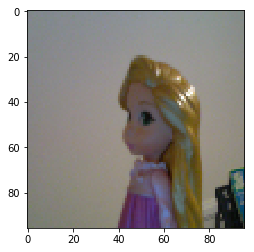

The type predicted is: RAPUNZEL


In [27]:
type_1 = preprocessing.image.load_img('./data/images_type_1/8.png',target_size=(width, height))

plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

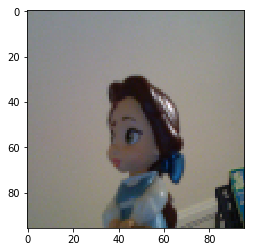

The type predicted is: BELLE


In [28]:
type_2 = preprocessing.image.load_img('./data/images_type_2/8.png',target_size=(width, height))

plt.imshow(type_2)
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

In [29]:
import time

#get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while (True):
    #read a new frame
    _, frame = camera.read()
    
    #flip the frameq
    frame = cv2.flip(frame, 1)
    
    #rescaling the camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))
    
    #add rectangle
    cv2.rectangle(frame, (150,75), (450, 375), (240, 100, 0), 2)
    
    #get ROI
    roi = frame[75+2:375-2, 150+2:450-2]
    
    #parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
    #resize
    roi = cv2.resize(roi, (width, height))
    
    #predict
    roi_X = np.expand_dims(roi, axis=0)
    
    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred, type_4_pred, type_5_pred, type_6_pred = predictions[0]
    
    #add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (10, 110), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    #add text
    type_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, type_2_text, (10, 140), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    #add text
    type_3_text = '{}: {}%'.format(class_names[2], int(type_3_pred*100))
    cv2.putText(frame, type_3_text, (10, 170), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    #add text
    type_4_text = '{}: {}%'.format(class_names[3], int(type_4_pred*100))
    cv2.putText(frame, type_4_text, (10, 200), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    #add text
    type_5_text = '{}: {}%'.format(class_names[4], int(type_5_pred*100))
    cv2.putText(frame, type_5_text, (10, 230), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    #add text
    type_6_text = '{}: {}%'.format(class_names[5], int(type_6_pred*100))
    cv2.putText(frame, type_6_text, (10, 260), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    #show the frame
    cv2.imshow("Test out", frame)
    
    key = cv2.waitKey(1)
    
    #quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
        
camera.release()
cv2.destroyAllWindows()

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)             0         
__________

In [31]:
model.save('Princess_cnn_model.h5')